# Итоговый проект по датасету Abalone
### Описание датасета Abalone

**Predict the age of abalone from physical measurements**

`Sex` - nominal -  M, F, and I (infant)

`Length` - continuous - mm -  Longest shell measurement

`Diameter` -  continuous - mm - perpendicular to length 

`Height` - continuous - mm - with meat in shell

`Whole weight` - continuous - grams - whole abalone

`Shucked weight` - continuous - grams - weight of meat

`Viscera weight` - continuous - grams - gut weight (after bleeding)

`Shell weight` - continuous - grams - after being dried

`Rings` (`Age` = `Rings` + 1.5) - integer -  +1.5 gives the age in years (target)

[Link](https://archive.ics.uci.edu/dataset/1/abalone) to the description of the original dataset.

In [388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [389]:
from pathlib import Path

DATASET_PATH = Path('datasets/abalone.csv')

In [390]:
df = pd.read_csv(DATASET_PATH)

In [391]:
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [392]:
# заменяем Rings на Age по условию задачи (если я понял правильно условия)
df.rename(columns={'Rings': 'Age'}, inplace=True)

In [393]:
# к Age добавляем 1.5 по условию задачи (если я понял правильно условия)
df['Age'] = df['Age'] + 1.5

In [394]:
# на всякий случае делаем сброс индексов
df.reset_index(drop=True, inplace=True)

In [395]:
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [396]:
# поменяем dtype для столбца Sex, так как он является категориальным
df['Sex'] = df['Sex'].astype('category')

In [397]:
df.reset_index(drop=True, inplace=True)

### Шаг 1. Общее исследование данных

In [398]:
# размерность датасета
df.shape

(4177, 9)

In [399]:
# более подробная информация о размерности и и типах датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   category
 1   Length          4177 non-null   float64 
 2   Diameter        4078 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4078 non-null   float64 
 5   Shucked weight  4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4127 non-null   float64 
 8   Age             4177 non-null   float64 
dtypes: category(1), float64(8)
memory usage: 265.5 KB


In [400]:
# вывод полезных характеристик датасета по числовым столбцам
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
mean,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,11.433684
std,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,10.500000
75%,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [401]:
# вывод полезных характеристик датасета по категориальным столбцам
df.describe(include='category')

,Sex
count,4177
unique,4
top,M
freq,1447


In [402]:
# поиск дубликатов
df[df.duplicated()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age


In [403]:
# количество пропущенных значений
df.isnull().sum().sum()

248

In [404]:
# вывод 10 случайных строчек
df.sample(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
245,I,0.350,0.260,0.085,0.1740,0.0705,0.0345,0.0600,11.5
3131,M,0.675,0.505,0.160,1.5320,0.7400,0.3570,NaN,12.5
2739,I,0.450,0.335,0.095,0.3505,0.1615,0.0625,0.1185,8.5
480,F,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.4750,30.5
23,F,0.550,0.415,0.135,0.7635,0.3180,0.2100,0.2000,10.5
4120,M,0.350,0.265,0.090,0.1970,0.0730,0.0365,0.0770,8.5
2297,M,0.475,0.360,0.120,0.5780,0.2825,0.1200,0.1700,9.5
428,F,0.560,0.455,0.125,0.9430,0.3440,0.1290,0.3750,22.5
2274,M,0.695,0.570,0.200,2.0330,0.7510,0.4255,0.6850,16.5
370,F,0.650,0.545,0.165,1.5660,0.6645,0.3455,0.4150,17.5


### Итог: Шаг 1. Общее исследование данных

#### Количественные характеристики
|                              Характеристика | Количество |
|--------------------------------------------:|:----------:|
|                            Количество строк |  **4177**  |
|                         Количество столбцов |   **9**    |
|  Количество числовых столбцов (int и float) |   **8**    |
| Количество категориальных столбцов (object) |   **1**    |
|                       Количество дубликатов |   **0**    |
|                  Количество пустых значений |  **248**   |

### Шаг 2. Однофакторный анализ

In [405]:
# проверка ошибочных значений по столбцу Sex
df['Sex'].unique()

['M', 'F', 'I', 'f']
Categories (4, object): ['F', 'I', 'M', 'f']

In [406]:
# обработка ошибочных значений по столбцу Sex
df['Sex'].replace('f', 'F', inplace=True)
df['Sex'].unique()

['M', 'F', 'I']
Categories (3, object): ['F', 'I', 'M']

In [407]:
# проверка ошибочных значений по числовым столбцам
numeric_column_indices = df.select_dtypes(include=['float', 'int']).columns
errors_indices = []
for index_column in numeric_column_indices:
    column = df[index_column]
    errors = column[column <= 0]
    if errors.shape[0] > 0:
        errors_index_list = errors.index.tolist()
        errors_indices += errors_index_list
        print(df.loc[errors_index_list])

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1257   I   0.430      0.34     0.0         0.428          0.2065   
3996   I   0.315      0.23     0.0         0.134          0.0575   

      Viscera weight  Shell weight  Age  
1257          0.0860        0.1150  9.5  
3996          0.0285        0.3505  7.5  


In [408]:
# обработка ошибочных значений по числовым столбцам
df.drop(errors_indices, inplace=True)
df.reset_index(drop=True)
df.shape

(4175, 9)

In [409]:
# количество пропусков в процентном соотношении по столбцам
na_list = df.isnull().mean() * 100
na_list = na_list[na_list != 0]
na_list

Diameter        2.371257
Whole weight    2.371257
Shell weight    1.197605
dtype: float64

In [410]:
# заполняем пустые значения медианной отдельно в каждом столбце
indices = na_list.index[:]
for index in indices:
    df[index].fillna(df[index].median(), inplace=True)

In [411]:
# остались ли пропуски? нет
df.isnull().mean() * 100

Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Age               0.0
dtype: float64

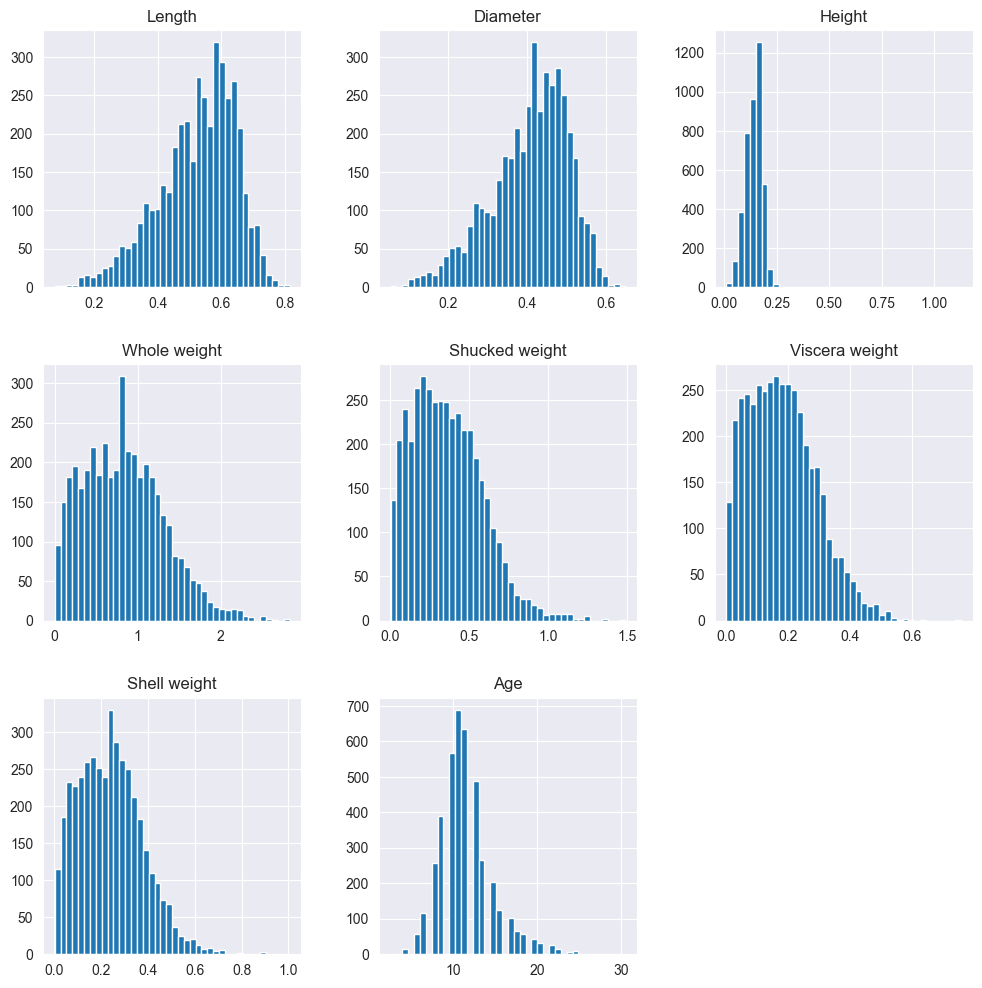

In [412]:
# распределения значений по всем числовым столбцам
# данные как можно заметить уже нормализованы (это не было учтено на прошлом шаге при поиске ошибочных данных)
# Length, Height (спорно, так как есть выбросы) Diameter, Age (есть пробоины): больше похоже на нормальное распределение
# Whole weight, Shucked weight, Viscera weight, Shell weight: больше похоже на логнормальное распределение
df.hist(bins=40, figsize=(12, 12));

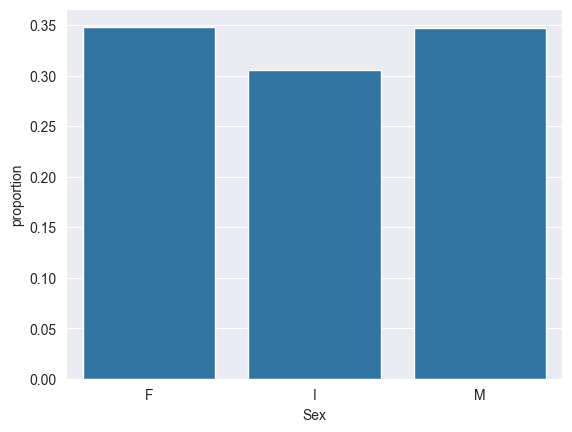

In [413]:
# вывод распределения единственного категориального столбца Sex
# равномерно распределены значения
sex_dist = df['Sex'].value_counts(normalize=True)
sns.barplot(data=sex_dist);

### Итог: Шаг 2. Однофакторный анализ

#### Дубликаты
Отсутствуют.

#### Пустые значения
Пресутсвуют в трех столбцах: `Diameter`, `Whole weight`, `Shell weight`.
Процентное соотношение пропусков по столбцам меньше 3%. 
Было принято решение заполнить пустые ячейки медианным значением внутри каждого столбца отдельно.

#### Ошибочные значения
Пресутсвуют в двух столбцах: `Sex` и `Height`.
`Sex`: присутствовало значение `f`, которое по задаче отсутствует. Логически было отнести значения `f` к `F`, что и было сделано.
`Height`: если не учитывать, что нормализация данных была проведена до разведочного анализа, то высота априори не может быть нулевой, поэтому было принято решение удалить строчки с нулевыми значениями.

#### Распределения
`Length`, `Height` (спорно, так как есть выбросы), `Diameter`, `Age` (есть пробоины): больше похоже на нормальное распределение
`Whole weight`, `Shucked weight`, `Viscera weight`, `Shell weight`: больше похоже на логнормальное распределение
`Sex`: равномерное распределение

#### Связь с целевой переменной 
* Не понял что подразумевается под этим в задаче на данном этапе, поэтому перенес данный пункт в следующй шаг.


### Шаг 3. Корреляции и связь с целевой переменной

In [414]:
# отображаем матрицы корреляций с разными методами (Пирсон, Спирман, Кендалл) корреляций на хитмапах
corr_pearson = df.corr(method='pearson', numeric_only=True)
corr_spearman = df.corr(method='spearman', numeric_only=True)
corr_kendall = df.corr(method='kendall', numeric_only=True)

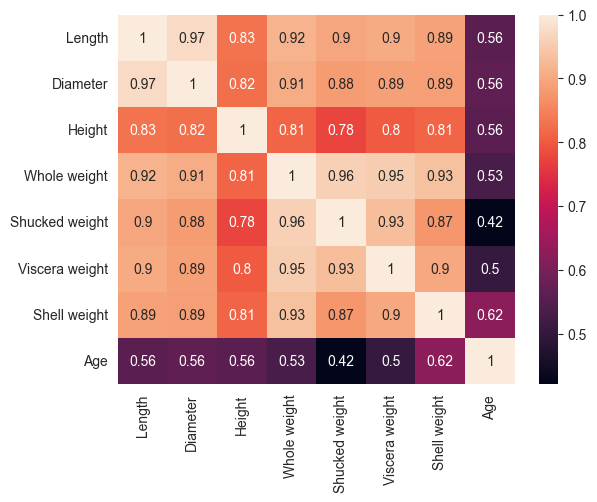

In [415]:
# корреляции по методу Пирсона
# между не целевыми переменными корреляции высокие
# между целевой и не целевыми переменными корреляции средние
sns.heatmap(data=corr_pearson, annot=True);

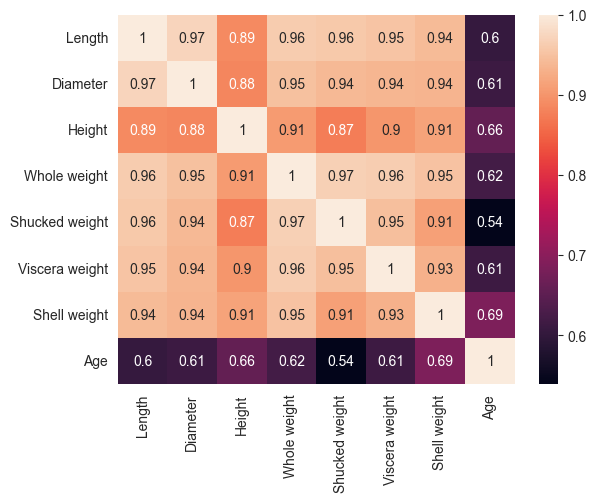

In [416]:
# корреляции по методу Спирмана
# между не целевыми переменными корреляции высокие
# между целевой и не целевыми переменными корреляции средние
# на удивление коэффициенты корреляций по данному методу высокие
sns.heatmap(data=corr_spearman, annot=True);

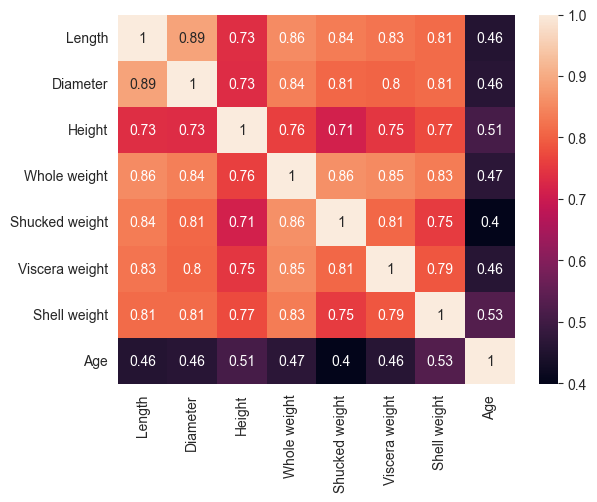

In [417]:
# корреляции по методу Кендалл
# между не целевыми переменными корреляции высокие
# между целевой и не целевыми переменными корреляции средние
sns.heatmap(data=corr_kendall, annot=True);

In [418]:
# так как у нас единственный категориальный признак, то надо только провести корреляции между числовыми признаками
# следовательно, V-меру Крамера не применить
# с помощью метода ANOVA измерим связь между категориальными и числовыми признаками
# все числовые признаки имеют связь между категориальными признаками 
from scipy.stats import f_oneway

corr_object = []

for c1 in df.select_dtypes(include=['category']):
    for c2 in df.select_dtypes(include=['float']):
        category_group_lists = df.groupby(c1, observed=True)[c2].apply(list)
        anova_results = f_oneway(*category_group_lists)

        if anova_results[1] >= 0.05:
            corr_object.append({'category': c1, 'numerical': c2, 'is correlated': 'No'})
        else:
            corr_object.append({'category': c1, 'numerical': c2, 'is correlated': 'Yes'})

anova_general_result = pd.DataFrame.from_dict(corr_object)
anova_general_result

,category,numerical,is correlated
0,Sex,Length,Yes
1,Sex,Diameter,Yes
2,Sex,Height,Yes
3,Sex,Whole weight,Yes
4,Sex,Shucked weight,Yes
5,Sex,Viscera weight,Yes
6,Sex,Shell weight,Yes
7,Sex,Age,Yes


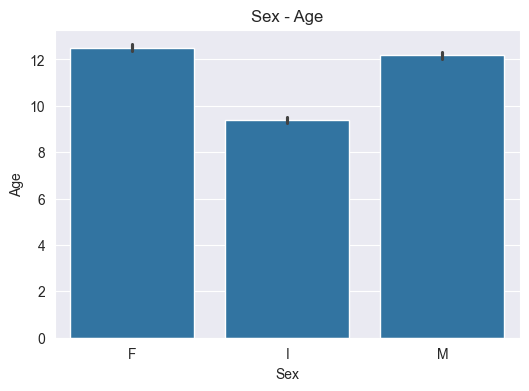

In [419]:
# график зависимости Sex от Age
# логично, что младшие особи являются infant
plt.figure(figsize=(6, 4))

sns.barplot(x='Sex', y='Age', data=df)
plt.title('Sex - Age')
plt.show();

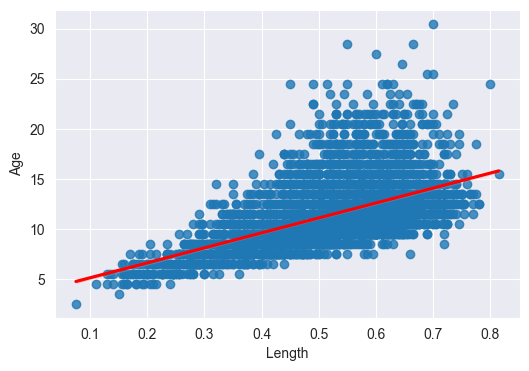

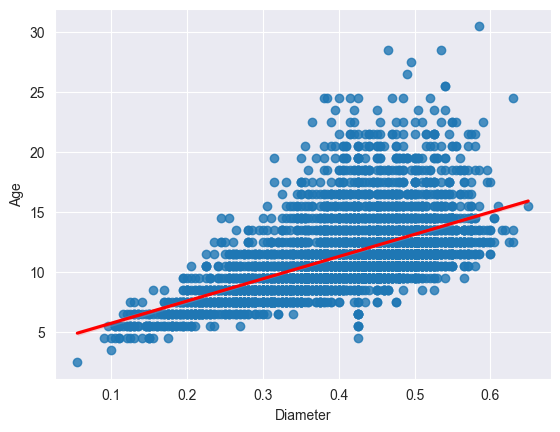

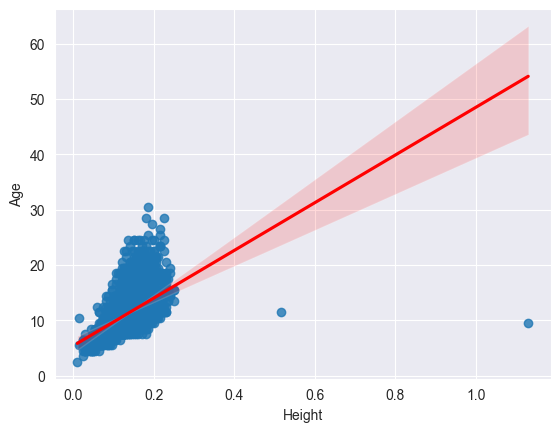

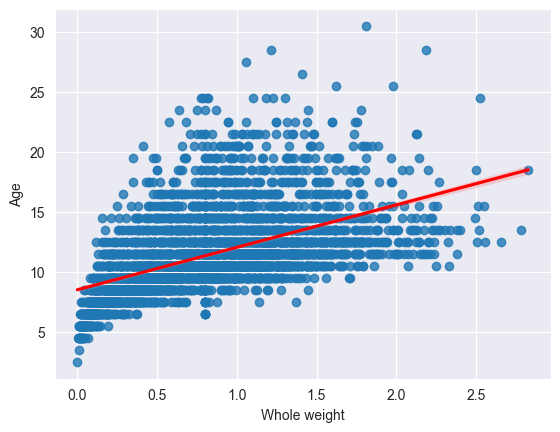

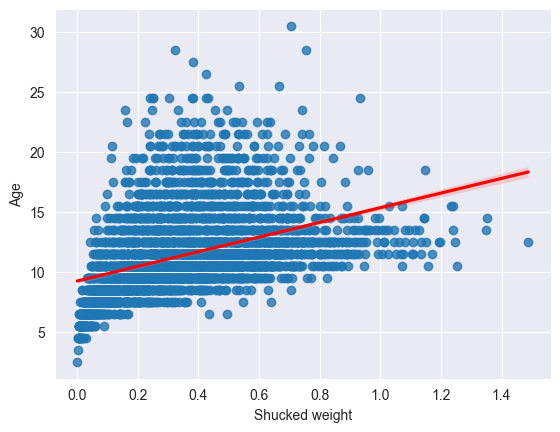

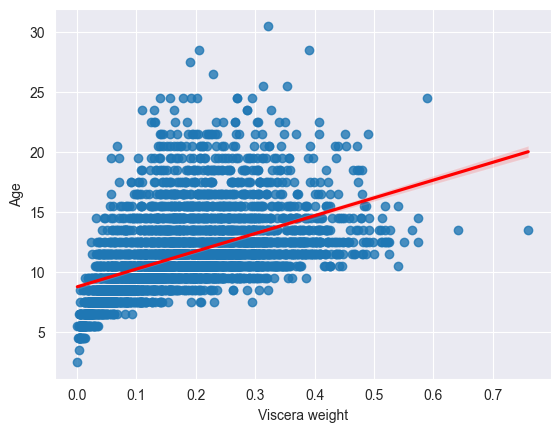

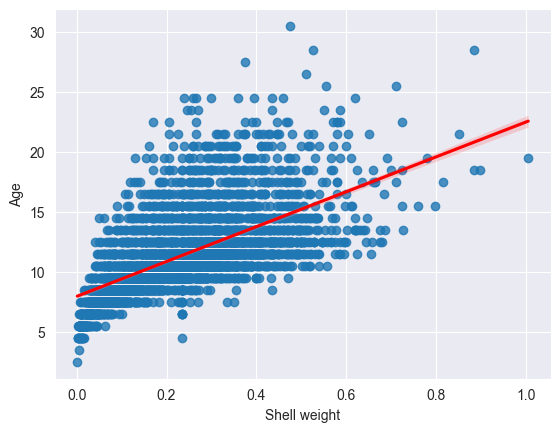

In [420]:
# графики зависимостей всех числовых признаков от Age
# Length - Age: что-то похожее на линейную корреляцию с некоторыми выбросами
# Diameter - Age: что-то похожее на линейную корреляцию с некоторыми выбросами
# Height - Age: больше похоже на квадратичную зависимость, чем на линейную. Но в целом сомнительно (в будущем надо будет высчитывать новый признак)
# Whole weight - Age: зависимость больше похоже на квадратичный корень, чем на линейную (в будущем надо будет высчитывать новый признак)
# Shucked weight - Age: зависимость больше похоже на квадратичный корень, чем на линейную (в будущем надо будет высчитывать новый признак)
# Viscera weight - Age: зависимость больше похоже на квадратичный корень, чем на линейную (в будущем надо будет высчитывать новый признак)
# Shell weight - Age: зависимость больше похоже на квадратичный корень, чем на линейную (в будущем надо будет высчитывать новый признак)
plt.figure(figsize=(6, 4))

for index in df.select_dtypes(include=['float']):
    if index == 'Age':
        continue
    sns.regplot(x=df[index], y=df['Age'], line_kws=dict(color="r"))
    plt.show()

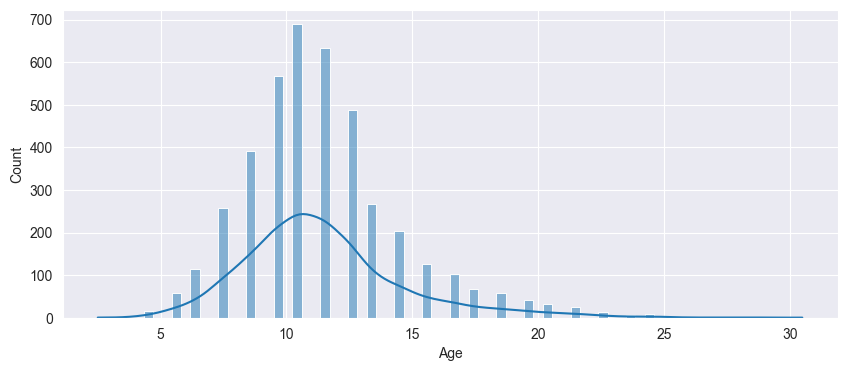

In [421]:
# распределение целевой переменной (Age)
# видим что-то похожее на нормальное распределение, но стоит отметить, что справа есть небольшой хвост
# также стоит отметить, что есть пробоины в районе значений от 5 до 10 и больше 10
plt.figure(figsize=(10, 4))
sns.histplot(df['Age'], kde=True);

### Итог: Шаг 3. Корреляции и связь с целевой переменной

#### Корреляции
Для анализа корреляций между признаками были использованы следующие методы: Пирсон, Спирман, Кендалл для числовых и ANOVA для категориальных с числовыми.
Категориальные признаки имеют связь со всеми числовыми признаками.
Между не целевыми (не `Age`) переменными корреляции высокие (от 0.75 до 0.96).
Между целевой (`Age`) и не целевыми переменными корреляции средние (от 0.45 до 0.6).
В целом удовлетворительные корреляции с целевой переменной (`Age`), но в будущем можно будет улучшить после подробного изучения связей с целевой переменой (следующий подпункт).

#### Связь с целевой переменной
Был построен график зависимости `Sex` от `Age`. 
В нем ничего удивительного не наблюдалось:
* `M` и `F` - взрослые особи, у которых возраст приблизительно одинаковый в среднем (у `M` больше на чуть-чуть);
* `I` - младенцы, у которых возраст меньше, чем у взрослых.
Были построены графики зависимостей всех числовых признаков от `Age`.
* `Length` - `Age`: что-то похожее на линейную корреляцию с некоторыми выбросами;
* `Diameter` - `Age`: что-то похожее на линейную корреляцию с некоторыми выбросами;
* `Height` - `Age`: больше похоже на квадратичную зависимость, чем на линейную. Но в целом сомнительно (в будущем надо будет высчитывать новый признак);
* `Whole weight` - `Age`: зависимость больше похоже на квадратичный корень, чем на линейную (в будущем надо будет высчитывать новый признак);
* `Shucked weight` - `Age`: зависимость больше похоже на квадратичный корень, чем на линейную (в будущем надо будет высчитывать новый признак);
* `Viscera weight` - `Age`: зависимость больше похоже на квадратичный корень, чем на линейную (в будущем надо будет высчитывать новый признак);
* `Shell weight` - `Age`: зависимость больше похоже на квадратичный корень, чем на линейную (в будущем надо будет высчитывать новый признак).

Также было построено отдельно распределение целевого признака (`Age`).
Было отмечено, что распределение похоже на нормальное, но стоит отметить, что справа есть небольшой хвост.
Также есть пробоины в районе значений от 5 до 10 и больше 10.

В целом с данными датасетом можно комфортно работать, так как есть что улучшать в сторону связей целевого признака с остальными числовыми признаками.

### Сравнение Pandas и Polars

In [422]:
import polars as pl

In [423]:
ABALONE_BIG_PATH = Path('temp/abalone_big.csv')

df_big = df.copy()
# дублируем данные до миллиона строчек
for i in range(1_000_000 // df_big.shape[0] + 1):
    df_big = pd.concat([df_big, df])

df_big.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   Sex             1006175 non-null  category
 1   Length          1006175 non-null  float64 
 2   Diameter        1006175 non-null  float64 
 3   Height          1006175 non-null  float64 
 4   Whole weight    1006175 non-null  float64 
 5   Shucked weight  1006175 non-null  float64 
 6   Viscera weight  1006175 non-null  float64 
 7   Shell weight    1006175 non-null  float64 
 8   Age             1006175 non-null  float64 
dtypes: category(1), float64(8)
memory usage: 70.0 MB


In [424]:
# сохраняем большой датасет
df_big.to_csv(ABALONE_BIG_PATH, index=False)

In [425]:
%%time
# Pandas
df_big = pd.read_csv(ABALONE_BIG_PATH)

CPU times: total: 656 ms
Wall time: 657 ms


In [426]:
%%time
# Polars
df_pl_big = pl.read_csv(ABALONE_BIG_PATH)

CPU times: total: 625 ms
Wall time: 96 ms


Polars загружает данные почти в 6 раз быстрее Pandas.

In [427]:
%%time
# Pandas
df_big[(df_big['Age'] <= 7) & (df_big['Sex'] == 'I')]

CPU times: total: 62.5 ms
Wall time: 60 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
42,I,0.240,0.175,0.045,0.07000,0.0315,0.0235,0.0200,6.5
43,I,0.205,0.150,0.055,0.79925,0.0255,0.0150,0.0120,6.5
44,I,0.210,0.150,0.050,0.04200,0.0175,0.0125,0.0150,5.5
58,I,0.245,0.190,0.060,0.08600,0.0420,0.0140,0.0250,5.5
125,I,0.270,0.195,0.060,0.07300,0.0285,0.0235,0.0300,6.5
...,...,...,...,...,...,...,...,...,...
1005962,I,0.270,0.205,0.075,0.11800,0.0590,0.0310,0.0305,5.5
1005963,I,0.270,0.190,0.060,0.09900,0.0445,0.0170,0.0300,6.5
1005993,I,0.185,0.135,0.045,0.03200,0.0110,0.0065,0.0100,5.5
1005994,I,0.245,0.175,0.055,0.07850,0.0400,0.0180,0.0200,6.5


In [428]:
%%time
# Polars
df_pl_big.filter((pl.col('Age') <= 7) & (pl.col('Sex') == 'I'))

CPU times: total: 0 ns
Wall time: 10 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
str,f64,f64,f64,f64,f64,f64,f64,f64
"""I""",0.24,0.175,0.045,0.07,0.0315,0.0235,0.02,6.5
"""I""",0.205,0.15,0.055,0.79925,0.0255,0.015,0.012,6.5
"""I""",0.21,0.15,0.05,0.042,0.0175,0.0125,0.015,5.5
"""I""",0.245,0.19,0.06,0.086,0.042,0.014,0.025,5.5
"""I""",0.27,0.195,0.06,0.073,0.0285,0.0235,0.03,6.5
"""I""",0.175,0.13,0.055,0.0315,0.0105,0.0065,0.0125,6.5
"""I""",0.17,0.13,0.095,0.03,0.013,0.008,0.01,5.5
"""I""",0.235,0.16,0.04,0.048,0.0185,0.018,0.015,6.5
"""I""",0.315,0.21,0.06,0.125,0.06,0.0375,0.035,6.5


Polars фильтрует данные почти в 5 раз быстрее Pandas.

In [429]:
%%time
# Pandas
(df_big.groupby('Sex')
 .agg(
    AgeMean=('Age', 'mean'),
    LengthMean=('Length', 'mean'),
    HeightMean=('Height', 'mean'),
).sort_values(by='AgeMean', ascending=False))

CPU times: total: 62.5 ms
Wall time: 71 ms


,AgeMean,LengthMean,HeightMean
Sex,,,
F,12.501376,0.572978,0.155959
M,12.178645,0.560059,0.150847
I,9.373626,0.427359,0.108100


In [430]:
%%time
# Polars
(df_pl_big
.group_by(by='Sex')
.agg([
    pl.mean('Age'),
    pl.mean('Length'),
    pl.mean('Height'),
])
.sort(by='Age', descending=True))

CPU times: total: 93.8 ms
Wall time: 30 ms


Sex,Age,Length,Height
str,f64,f64,f64
"""F""",12.501376,0.572978,0.155959
"""M""",12.178645,0.560059,0.150847
"""I""",9.373626,0.427359,0.1081


Polars агрегирует данные почти в 2 раз быстрее Pandas.

### Итог: Сравнение Pandas и Polars
В целом Polars намного быстрее Pandas. А если еще грамотно использовать lazy запуск в Polars, то можно выиграть по времени в 20 раз по сравнению с Pandas.

## Заключение
Данные адекватные, имеют зависимости с целевым признаком, есть куда работать.